<a href="https://colab.research.google.com/github/moh2-lh/moh2-lh/blob/main/Copy_of_01_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© 2021 Zaka AI, Inc. All Rights Reserved

#Image Processing

**Objective:** The goal from this exercise is to learn the basic image processing techniques using OpenCV's cv2 library. This includes:


*   Changing Color Space
*   Image Thresholding
*   Image Gradients
*   Image Contouring



Let's start by downloading and reading an image

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  119k  100  119k    0     0   588k      0 --:--:-- --:--:-- --:--:--  588k


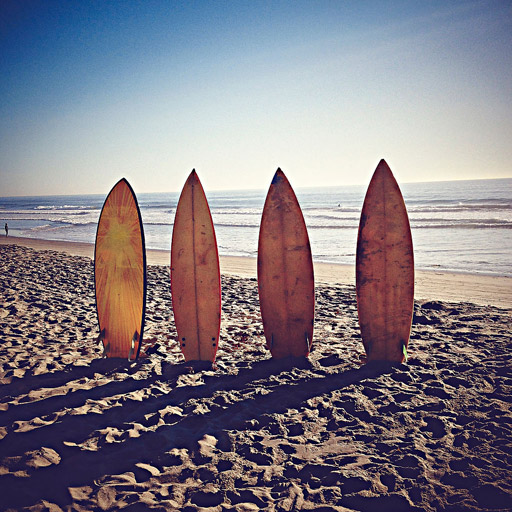

In [1]:
!curl -o img.jpg https://files.readme.io/069a96b-4d870d7-546212389.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("img.jpg", cv2.IMREAD_COLOR)
cv2_imshow(img)

## Changing Color-space

For color conversion, we use the function `cv2.cvtColor(input_image, flag)` where flag determines the type of conversion.

Convert to greyscale

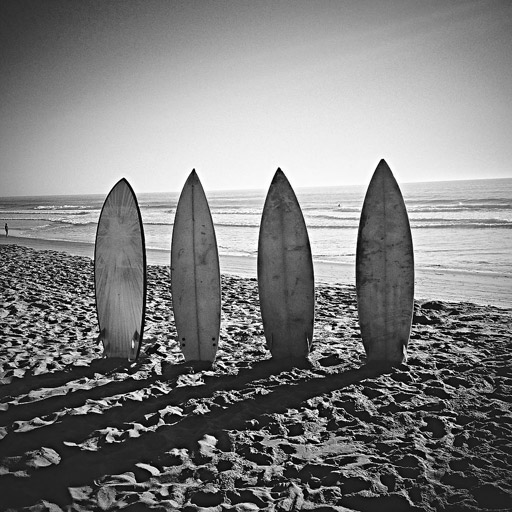

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert BGR to GRAY
cv2_imshow(gray)

There are more than 150 color-space conversion methods available in OpenCV. But the two which are the most widely used are BGR ↔ Gray and BGR ↔ HSV.


In [3]:
# let's list all possible color-space conversion methods
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

## Image Thresholding

If a pixel value is greater than a threshold value, it is assigned one value (white), else it is assigned another value (black). The function used is `cv2.threshold`

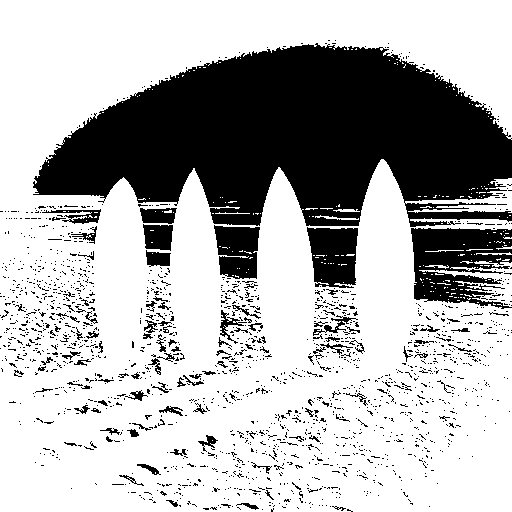

In [4]:
# input image should be GRAYSCALE
retval, threshold = cv2.threshold(gray, 180, 255, cv2.cv2.THRESH_BINARY_INV)
cv2_imshow(threshold)

### Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be a good fit in all the conditions where image has different lighting conditions in different areas.

In that case, we go for adaptive thresholding. With it, the algorithm calculates the threshold for small regions of the image.

We get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

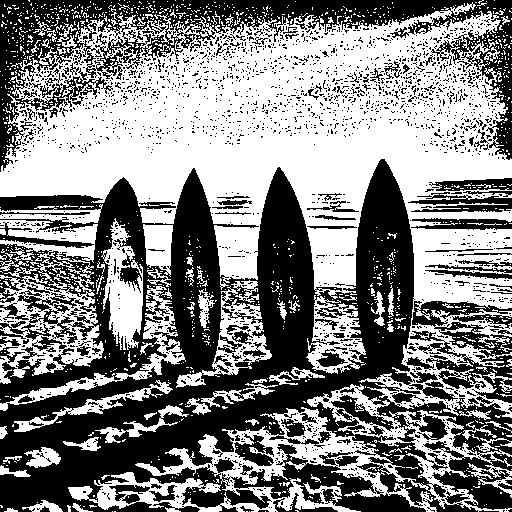

In [5]:
adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2_imshow(adaptive_threshold)

## Image Gradients

### Sobel
Sobel allows you to find horizontal or vertical lines and edges.

Sobel X


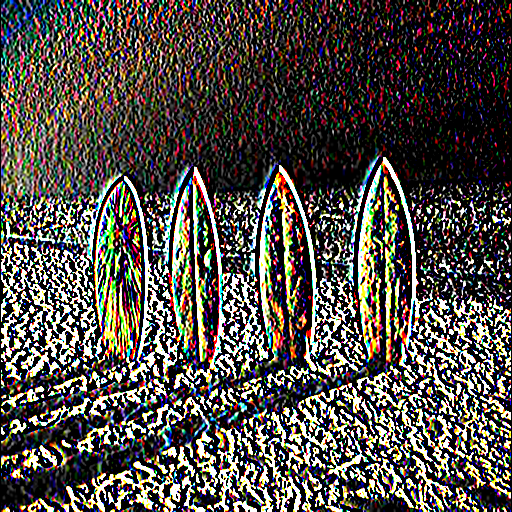

Sobel Y


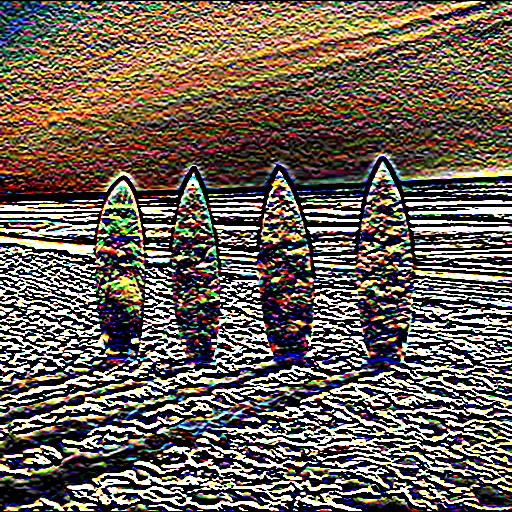

Sobel XY


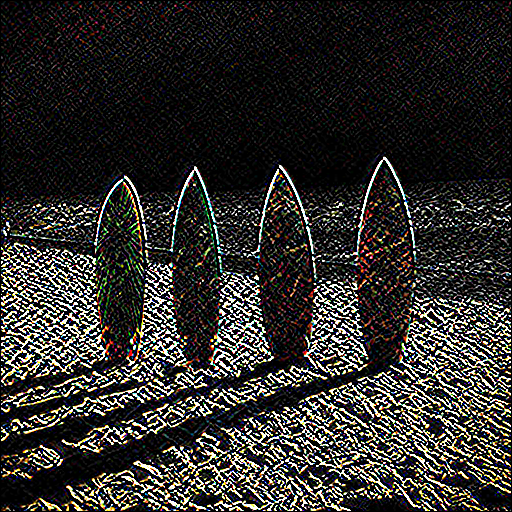

In [6]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=5)

print("Sobel X")
cv2_imshow(sobelx)
print("Sobel Y")
cv2_imshow(sobely)
print("Sobel XY")
cv2_imshow(sobelxy)

## Find contours

To find contours, first we prepare the image and so we need to:
1. Convert to grayscale
2. Gaussian blur to remove small noises in images
3. Apply thresholding
4. Use `findContours` to locate contours in the image

In [7]:
dst = cv2.GaussianBlur(gray,(1,1),cv2.BORDER_DEFAULT)
ret, thresh = cv2.threshold(dst, 200, 255, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

**How to draw the contours?**

To draw the contours, `cv2.drawContours` function is used.

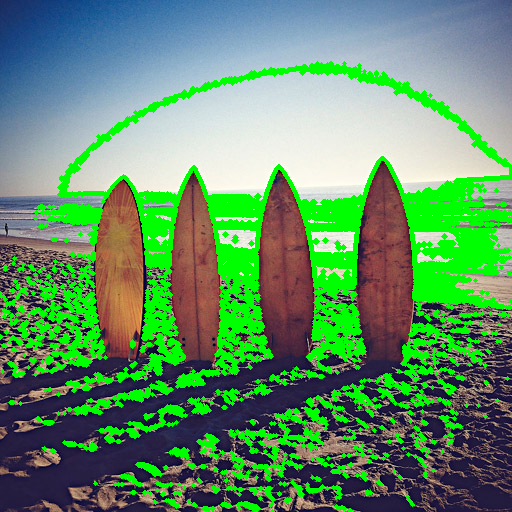

In [8]:
import copy

c_img = cv2.drawContours(copy.copy(img), contours, -1, (0,255,0), 3)

cv2_imshow(c_img)

To better demonstrate the abilities of `drawContours`, let's use it on a simpler image with straight lines and less noise, and simple geometric shapes

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84120  100 84120    0     0   453k      0 --:--:-- --:--:-- --:--:--  453k


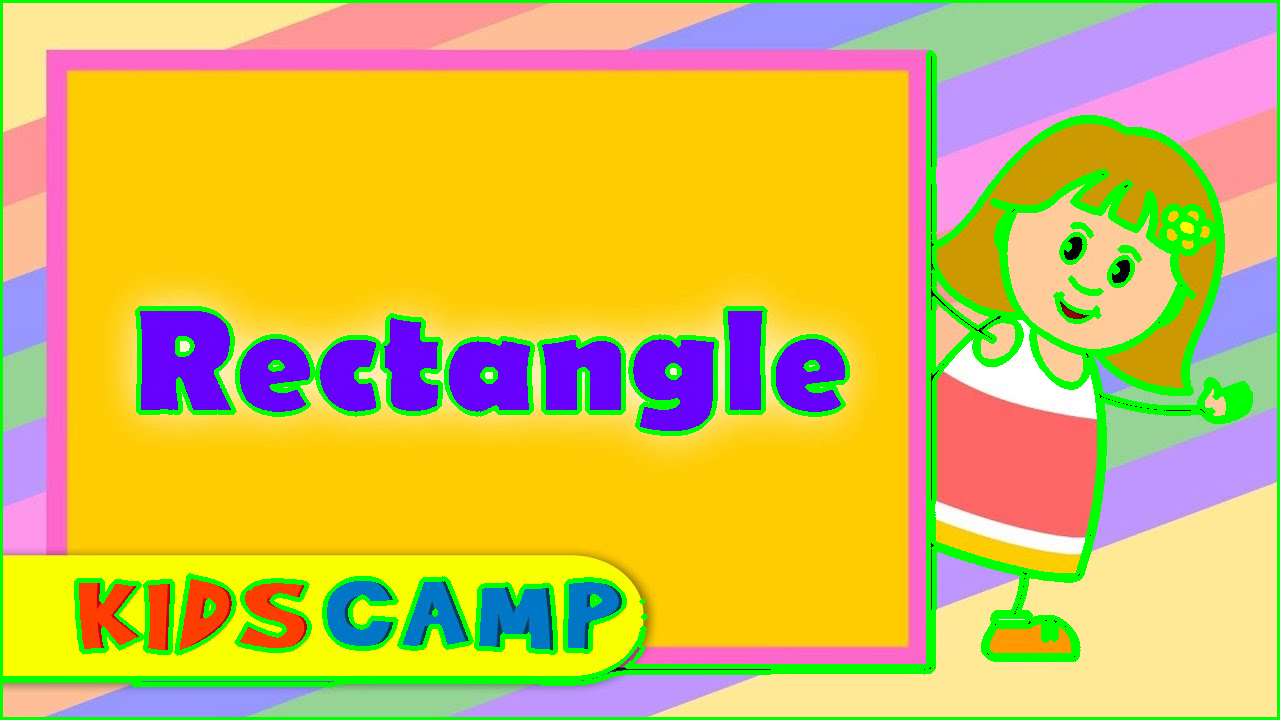

In [9]:
# let's try on a simpler image
!curl -o test.jpg https://i.ytimg.com/vi/cW5muVaoK4I/maxresdefault.jpg

test = cv2.imread("test.jpg", cv2.IMREAD_COLOR)
grayscale = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(grayscale, 120, 255, 0)

contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

final_img = cv2.drawContours(test, contours, -1, (0,255,0), 3)

final = cv2.resize(final_img, (300,300))

cv2_imshow(final_img)

Elsewhere, the thresholded image looks like this...

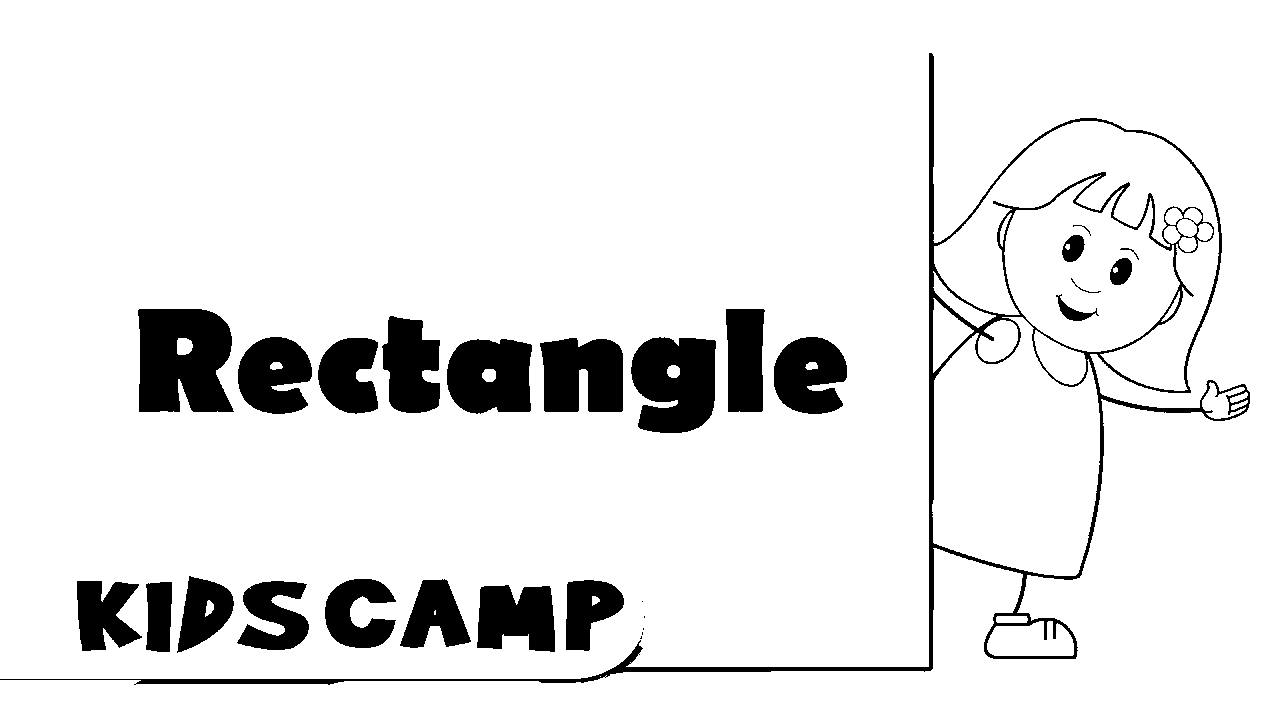

In [10]:
cv2_imshow(threshold)